In [2]:
import os
#CWD='/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/Pipelines/RNAseq/'
import param as param
import pandas as pd

### get time stamp for each dataset

In [48]:
%time os.system('ls -lah --full-time {}>.progress.tsv'.format(param.count_out_dir))

CPU times: user 12 ms, sys: 12 ms, total: 24 ms
Wall time: 5min 54s


0

In [3]:
progressDf=pd.read_csv('.progress.tsv',sep='\s+',skiprows=3,header=None)

In [4]:
progressDf.columns=['permission','','','','size','date_str','time','','fname']

In [5]:
m=progressDf['fname'].str.contains('abundance.tsv.gz')
progressDf_sub=progressDf[m]

In [26]:
#progressDf_sub

In [6]:
progressDf_sub['date_time']=pd.to_datetime(progressDf_sub['date_str'])

/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### data cumulative distribution over time

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

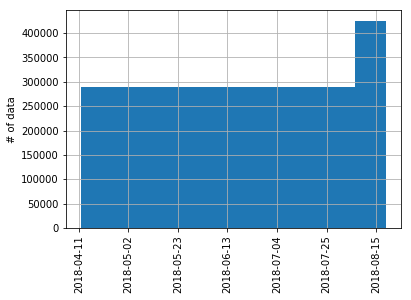

In [14]:
ax=progressDf_sub['date_time'].hist(cumulative=True)
ax.set_ylabel('# of data')
#plt.xticks(x, labels, rotation='vertical')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )

ax.figure.savefig('../../Analysis/Figures/DataAvail/{}.pdf'.format(param.pipelineName))
ax.figure.savefig('../../Analysis/Figures/DataAvail/{}.pdf'.format(param.pipelineName))

In [24]:
'../../Analysis/Figures/DataAvail/{}.pdf'.format(param.pipelineName)

'../../Analysis/Figures/DataAvail/TranscriptCounting.pdf'